## 資料集

### Bank Marketing Data Set
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

### 目標

Predict if the client will subscribe a term deposit. (分類模型)

### 指標

AUC (Area Under Curve) = TPR / FPR

### 變數

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
def data_overview():
    """
    input: dataset
    output: data summary
    """
    print('Rows:', df.shape[0])
    print('Columns:', df.shape[1])
    print('Missing Number Total', df.isnull().sum().values.sum())
    for c in df.columns:
        print('{:15}: '.format(c), df.loc[:,c].nunique(), '\t', df.loc[:, c].unique()[:5])

data_overview()

Rows: 41188
Columns: 21
Missing Number Total 0
age            :  78 	 [56 57 37 40 45]
job            :  12 	 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician']
marital        :  4 	 ['married' 'single' 'divorced' 'unknown']
education      :  8 	 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course']
default        :  3 	 ['no' 'unknown' 'yes']
housing        :  3 	 ['no' 'yes' 'unknown']
loan           :  3 	 ['no' 'yes' 'unknown']
contact        :  2 	 ['telephone' 'cellular']
month          :  10 	 ['may' 'jun' 'jul' 'aug' 'oct']
day_of_week    :  5 	 ['mon' 'tue' 'wed' 'thu' 'fri']
duration       :  1544 	 [261 149 226 151 307]
campaign       :  42 	 [1 2 3 4 5]
pdays          :  27 	 [999   6   4   3   5]
previous       :  8 	 [0 1 2 3 4]
poutcome       :  3 	 ['nonexistent' 'failure' 'success']
emp.var.rate   :  10 	 [ 1.1  1.4 -0.1 -0.2 -1.8]
cons.price.idx :  26 	 [93.994 94.465 93.918 93.444 93.798]
cons.conf.idx  :  26 	 [-36.4 -41.8 -42.7 -36.1 -40.

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# Change Yes/No to 1/0
df = df.replace({'yes': 1, 'no': 0})

## EDA 

In [2]:
# plot in jupyter notebook
import plotly.offline as py 
py.init_notebook_mode(connected=True)
# import graph objects
import plotly.graph_objs as go
# the tools can make subplots
import plotly.tools as tls

In [7]:
# Get Label
lab = df.y.value_counts().keys().tolist() 
# Get Count
values = df.y.value_counts().values.tolist()

trace = go.Pie(labels=lab, values=values,
               marker=dict(colors=['royalblue', 'lime'],
                           line=dict(color='white',
                                     width=1.3)),
               rotation=90,
               hole = .5) # Diameter

layout = go.Layout(dict(title='Subscribe Term Deposit'),
                        plot_bgcolor="rgb(243,243,243)", # backgroud color
                        paper_bgcolor="rgb(243,243,243)")

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

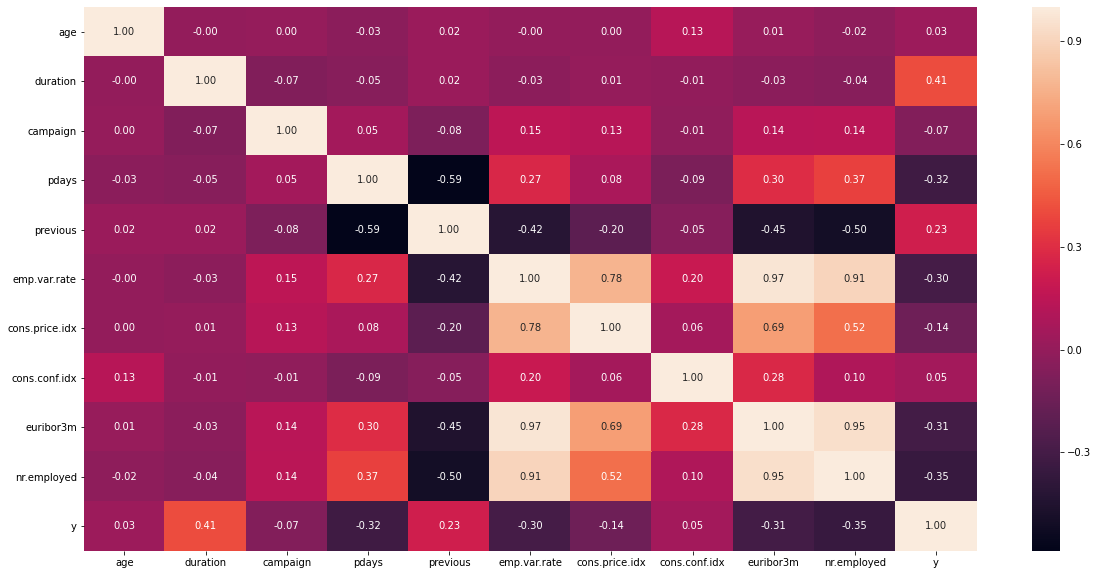

In [8]:
# heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

## Job

In [9]:
# value counts
df[df['job'] == 'unknown'][['job', 'y']].groupby(('job', 'y')).size()

job      y
unknown  0    293
         1     37
dtype: int64

In [10]:
# Filter unknown value
df = df[df['job'] != 'unknown']

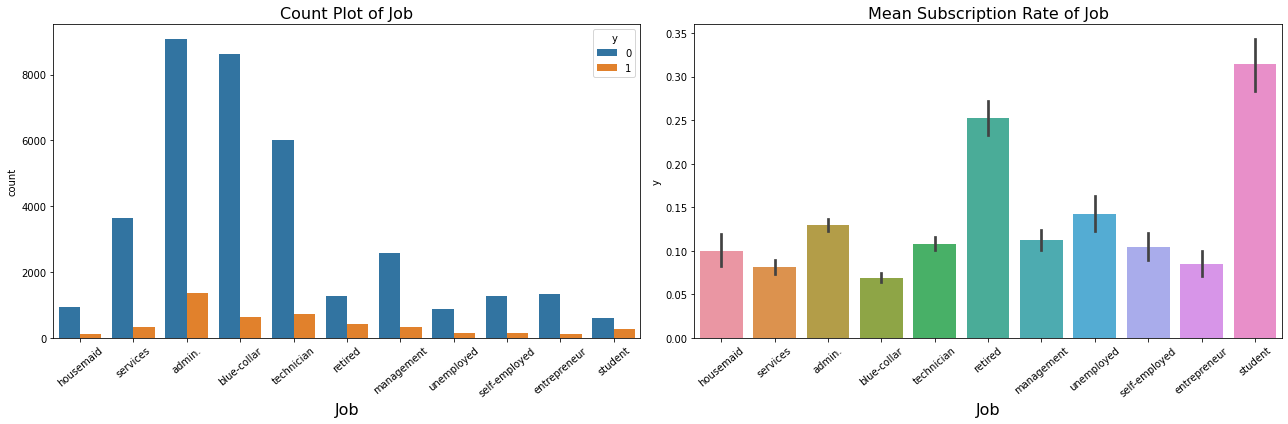

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different Results
sns.countplot(x='job', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Job', fontsize=16)
ax[0].set_xlabel('Job', fontsize=16)
ax[0].set_xticklabels(df['job'].unique(), rotation=40)

# Subscription Rate
sns.barplot(x='job', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Job', fontsize=16)
ax[1].set_xlabel('Job', fontsize=16)
ax[1].set_xticklabels(df['job'].unique(), rotation=40)
plt.tight_layout()
plt.savefig('Job.png')
plt.show()

## Marital 

In [12]:
df[df['marital'] == 'unknown'][['marital', 'y']].groupby(('marital', 'y')).size()

marital  y
unknown  0    62
         1     9
dtype: int64

In [13]:
# Filter out unknown value
df = df[df['marital'] != 'unknown']

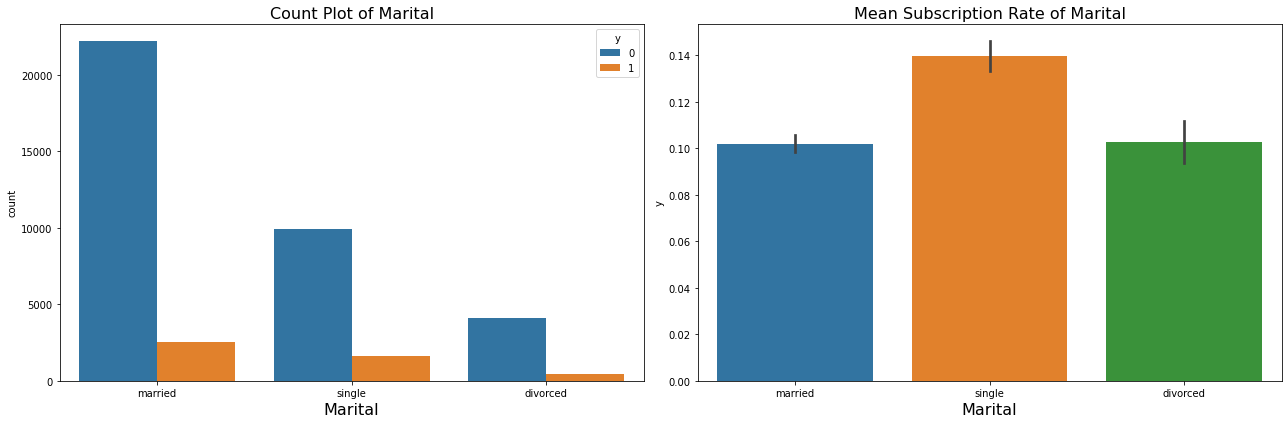

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different Results
sns.countplot(x='marital', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Marital', fontsize=16)
ax[0].set_xlabel('Marital', fontsize=16)

# Subscription Rate
sns.barplot(x='marital', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Marital', fontsize=16)
ax[1].set_xlabel('Marital', fontsize=16)

plt.tight_layout()
plt.show()

## Education

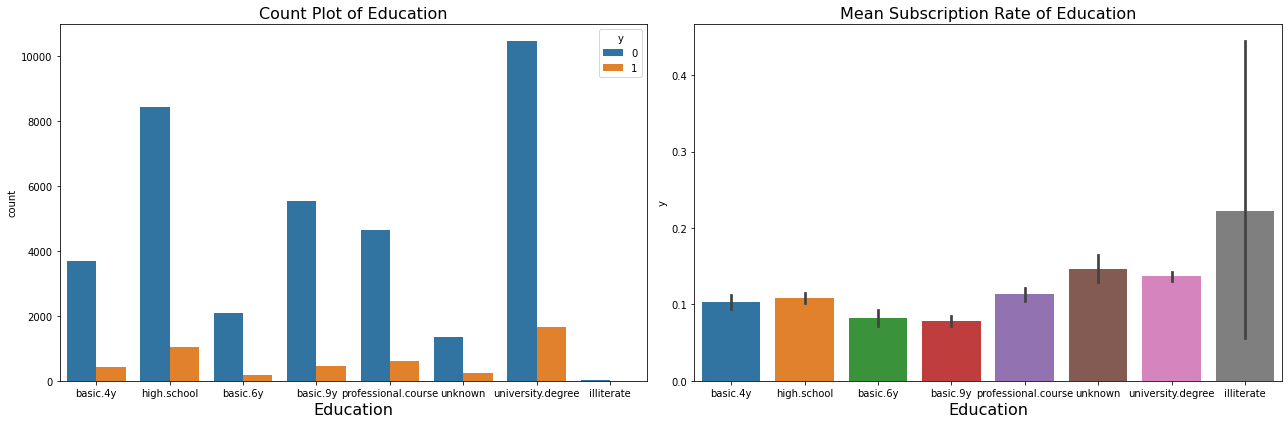

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different Results
sns.countplot(x='education', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Education', fontsize=16)
ax[0].set_xlabel('Education', fontsize=16)

# Subscription Rate
sns.barplot(x='education', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Education', fontsize=16)
ax[1].set_xlabel('Education', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
# Find similar education in k-means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Find k-means
pca = PCA(0.95) # Find the varaibles that can explain 95% of variance
pca_df = pca.fit_transform(pd.get_dummies(df))
clusters = range(2, 9)
# Use two method to find best cluster
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_jobs=-1)
    kmeans = kmeans.fit(pca_df)
    label = kmeans.predict(pca_df)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(pca_df, label))

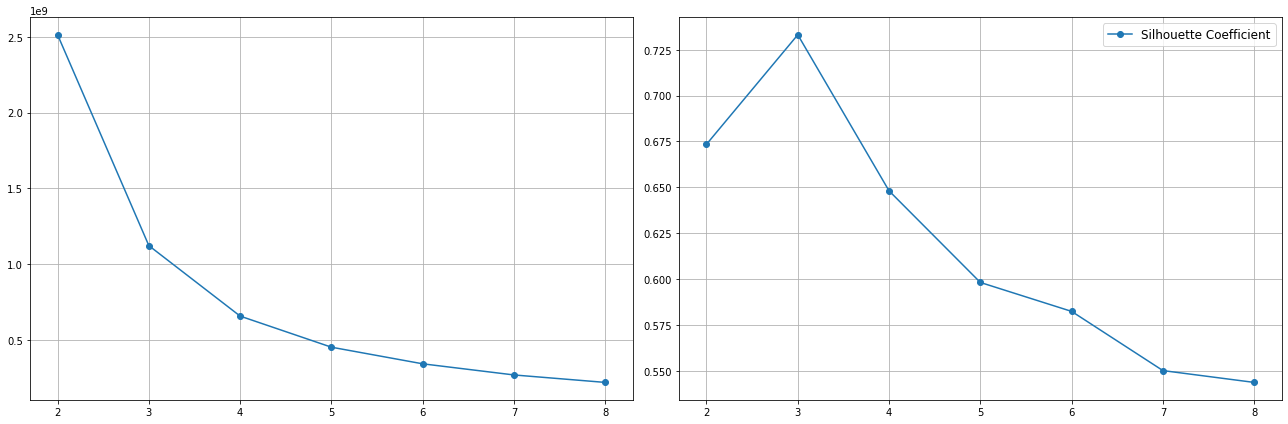

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Elbow Method (Find the elbow)
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)

# Silhouette Method (Find Max)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
df.reset_index(drop=True, inplace=True)

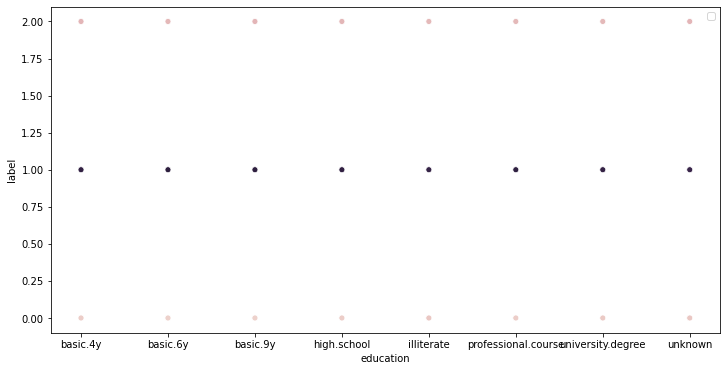

In [19]:
# Use best cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(pca_df)
label = kmeans.predict(pca_df)
cluster_edu = pd.concat([pd.DataFrame(label, columns=['label']), df['education']], axis=1).groupby(['education', 'label']).size()
cluster_edu_ratio = cluster_edu.groupby(level=0).apply(lambda x: x/x.sum()).reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='education', y='label', hue=0, data=cluster_edu_ratio)
plt.legend(labels='')

In [20]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [21]:
pd.crosstab(index=df['education'], columns=df['y']).apply(lambda x: x/x.sum(), axis=1)

y,0,1
education,,
basic.4y,0.897280,0.102720
basic.6y,0.917403,0.082597
basic.9y,0.921745,0.078255
high.school,0.891378,0.108622
illiterate,0.777778,0.222222
professional.course,0.886316,0.113684
university.degree,0.863261,0.136739
unknown,0.853383,0.146617


In [22]:
# Replace unknown value
df['education'] = df['education'].replace({'unknown': 'university.degree'})

## Default

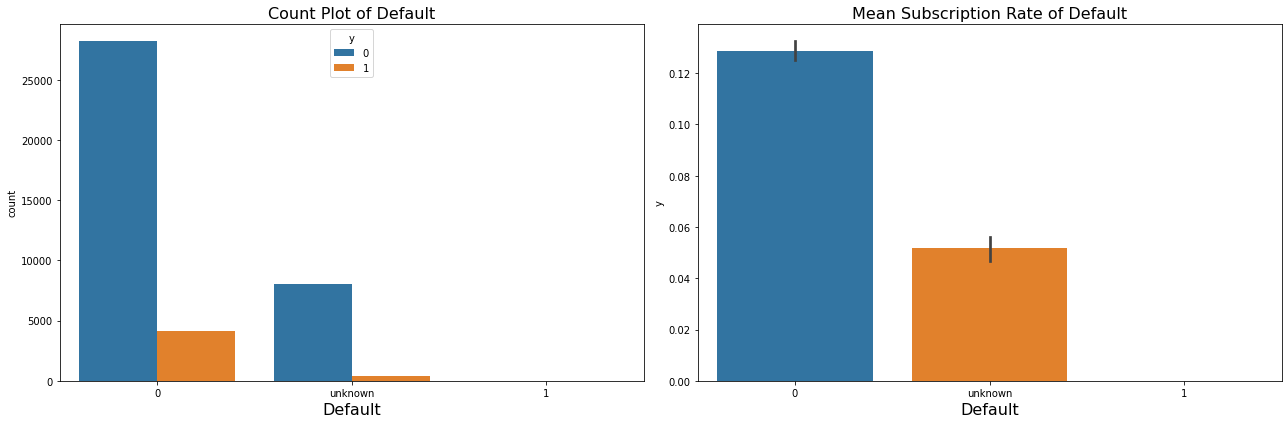

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='default', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Default', fontsize=16)
ax[0].set_xlabel('Default', fontsize=16)

# Subscription rate
sns.barplot(x='default', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Default', fontsize=16)
ax[1].set_xlabel('Default', fontsize=16)

plt.tight_layout()
plt.show()

In [24]:
# df.drop(columns='default', inplace=True)

## Housing

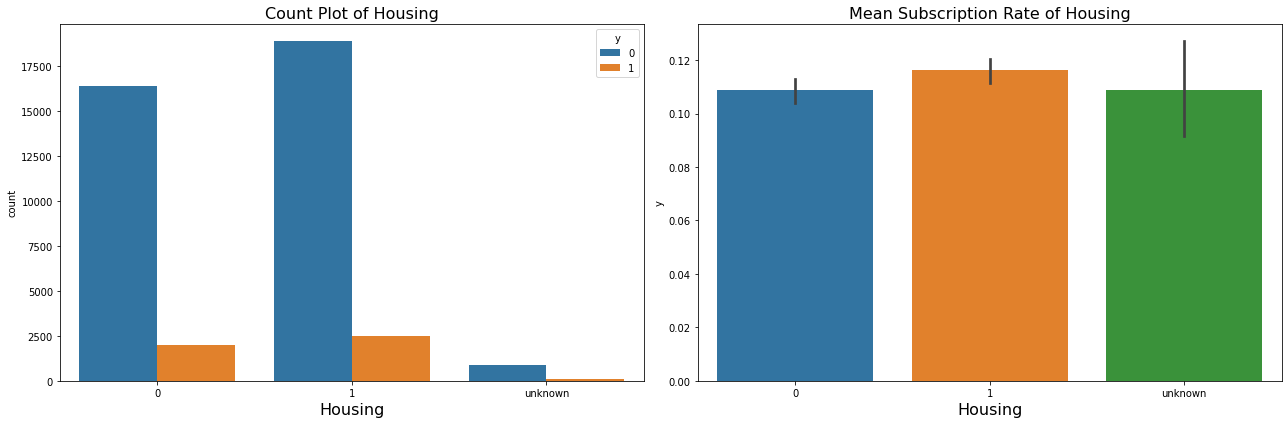

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='housing', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Housing', fontsize=16)
ax[0].set_xlabel('Housing', fontsize=16)

# Subscription rate
sns.barplot(x='housing', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Housing', fontsize=16)
ax[1].set_xlabel('Housing', fontsize=16)

plt.tight_layout()
plt.show()

## Loan

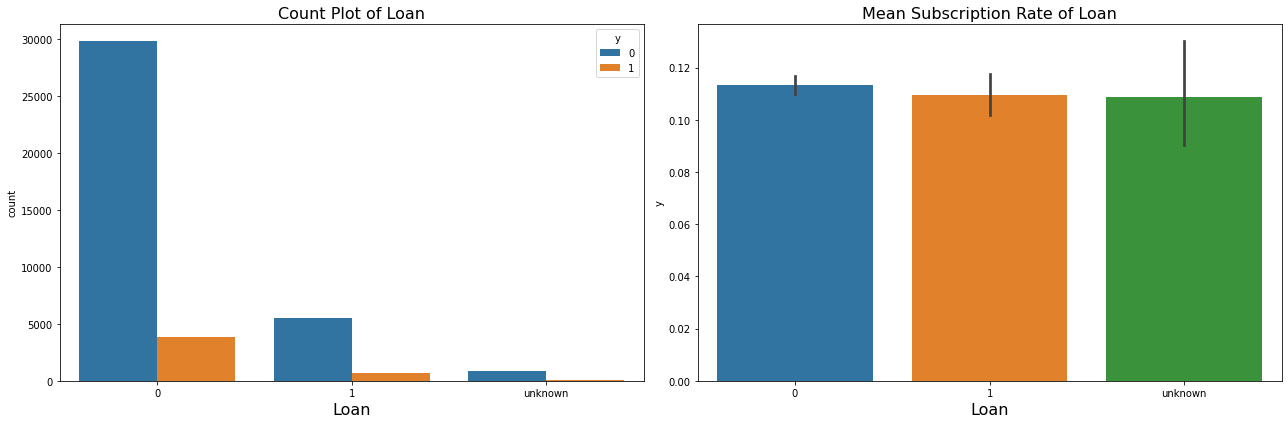

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='loan', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Loan', fontsize=16)
ax[0].set_xlabel('Loan', fontsize=16)

# Subscription Rate
sns.barplot(x='loan', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Loan', fontsize=16)
ax[1].set_xlabel('Loan', fontsize=16)

plt.tight_layout()
plt.show()

## Contact

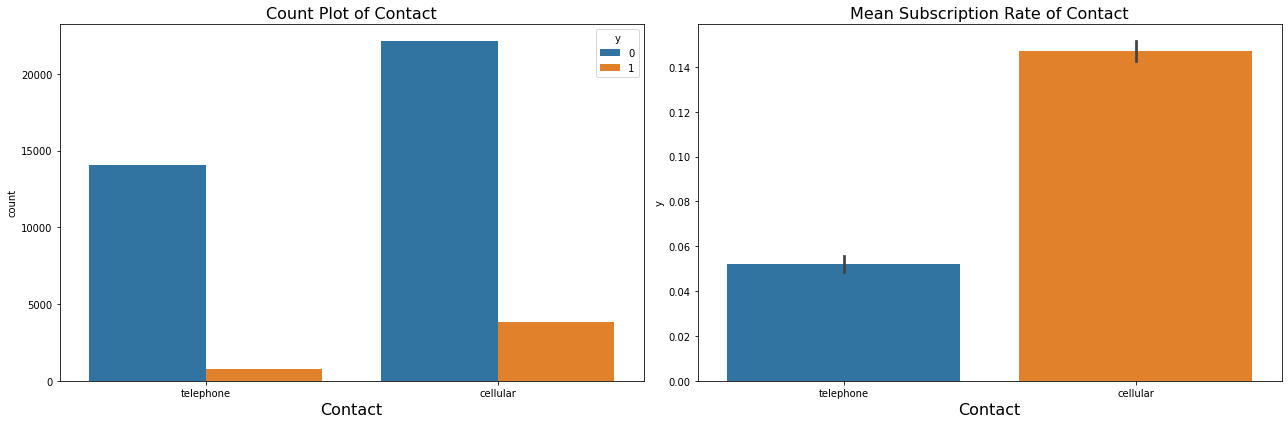

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='contact', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Contact', fontsize=16)
ax[0].set_xlabel('Contact', fontsize=16)

# Subscription rate
sns.barplot(x='contact', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Contact', fontsize=16)
ax[1].set_xlabel('Contact', fontsize=16)

plt.tight_layout()
plt.show()

## Month

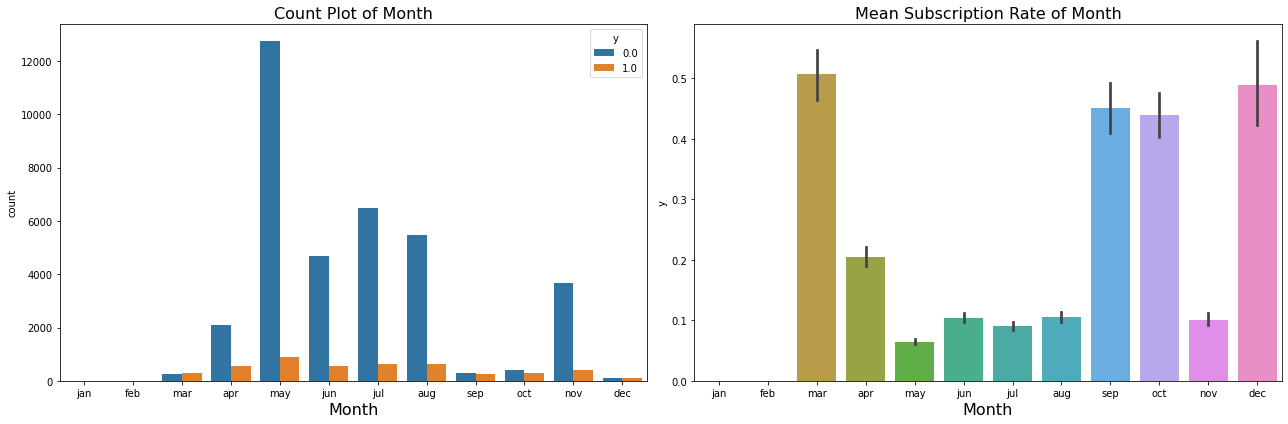

In [28]:
# Order the month from Janaury to December
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_month_inorder = df.set_index('month').loc[month_order].reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Differen results
sns.countplot(x='month', hue='y', data=df_month_inorder, ax=ax[0])
ax[0].set_title('Count Plot of Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=16)

# Subscription rate
sns.barplot(x='month', y='y', data=df_month_inorder, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=16)

plt.tight_layout()
plt.show()

## day_of_week

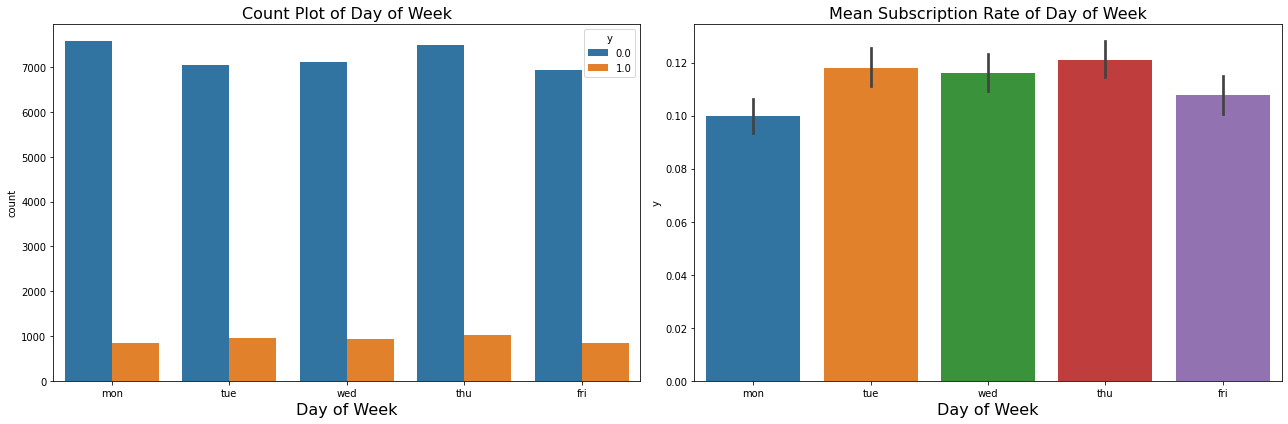

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='day_of_week', hue='y', data=df_month_inorder, ax=ax[0])
ax[0].set_title('Count Plot of Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=16)

# Subscription rate
sns.barplot(x='day_of_week', y='y', data=df_month_inorder, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=16)

plt.tight_layout()
plt.show()

## poutcome

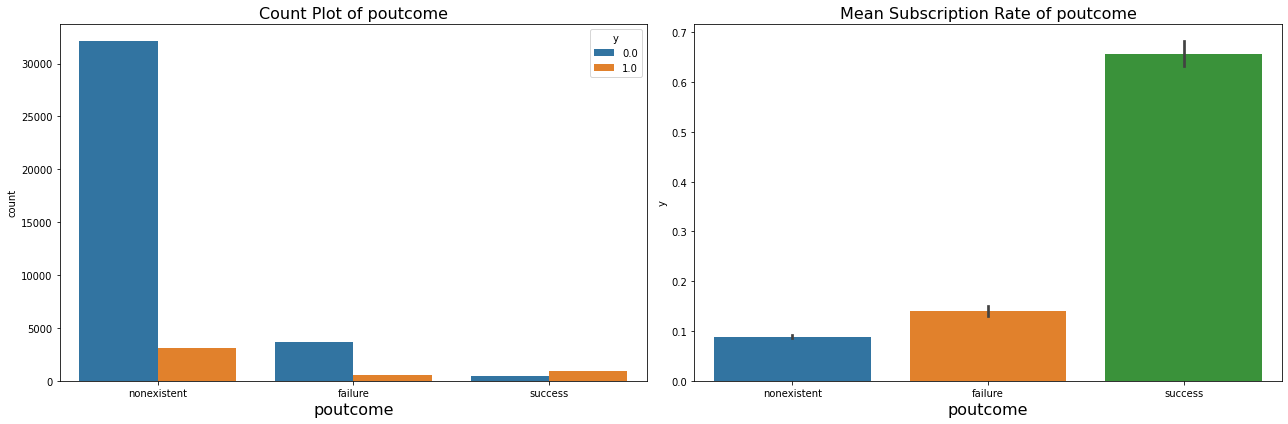

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='poutcome', hue='y', data=df_month_inorder, ax=ax[0])
ax[0].set_title('Count Plot of poutcome', fontsize=16)
ax[0].set_xlabel('poutcome', fontsize=16)

# Subscription rate
sns.barplot(x='poutcome', y='y', data=df_month_inorder, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of poutcome', fontsize=16)
ax[1].set_xlabel('poutcome', fontsize=16)

plt.tight_layout()
plt.show()

## Age

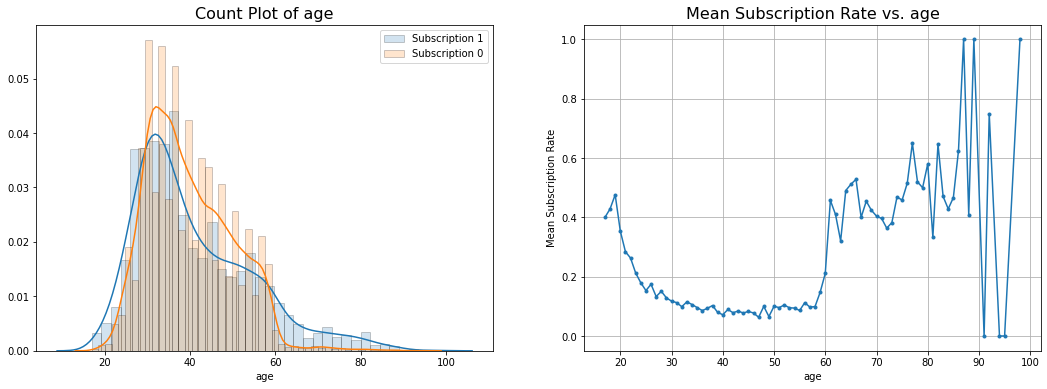

In [31]:
grouped = df[['age', 'y']].groupby('age').mean().reset_index()
# hist type
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# histogram plot (Different results)
sns.distplot(df[df['y'] == 1]['age'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['age'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of age', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['age'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

In [32]:
# Feature Engineering
df['age_group'] = df['age'].apply(lambda x: 'old' if x >= 60 else 'mid' if x >= 30 else 'low')
df.drop(columns='age', inplace=True)

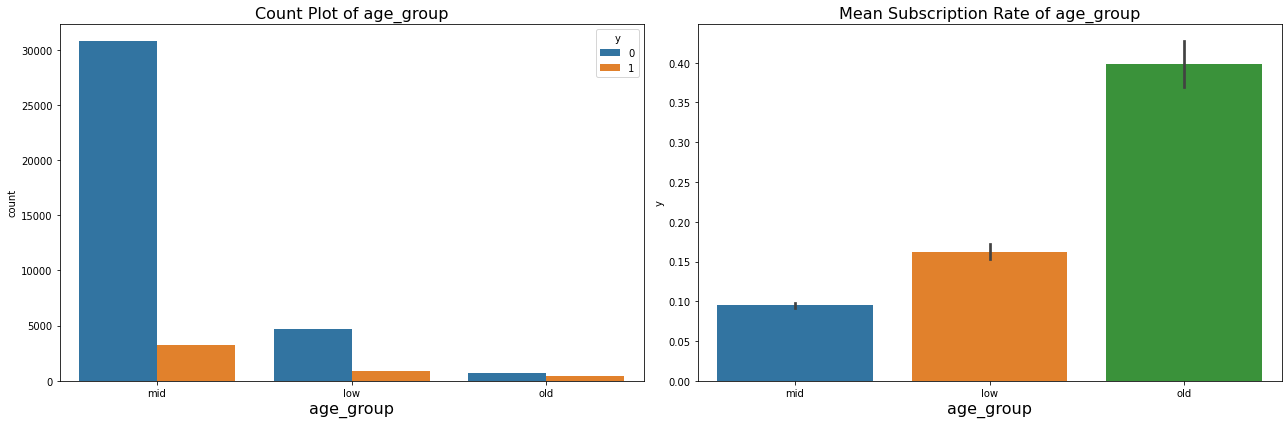

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='age_group', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of age_group', fontsize=16)
ax[0].set_xlabel('age_group', fontsize=16)

# Subscription rate
sns.barplot(x='age_group', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of age_group', fontsize=16)
ax[1].set_xlabel('age_group', fontsize=16)

plt.tight_layout()
plt.show()

## duration 

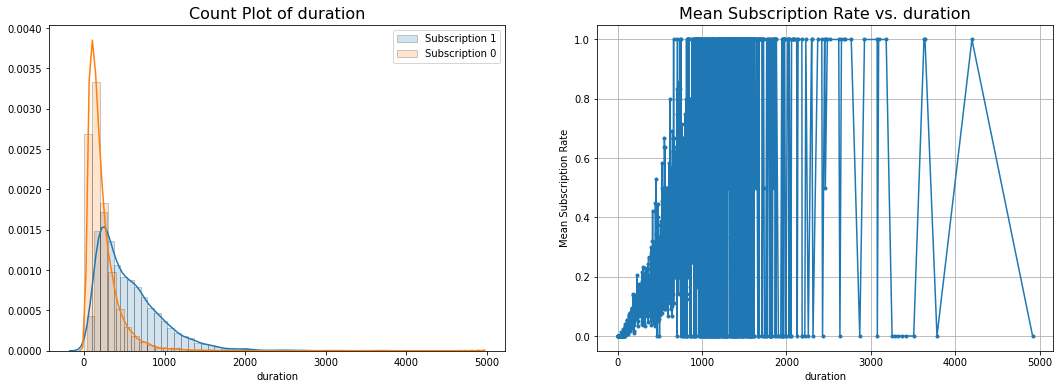

In [34]:
grouped = df[['duration', 'y']].groupby('duration').mean().reset_index()
# histogram
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['duration'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['duration'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of duration', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['duration'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. duration', fontsize=16)
ax[1].set_xlabel('duration')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

In [35]:
# Drop duration
df.drop(columns='duration', inplace=True)

## Campaign

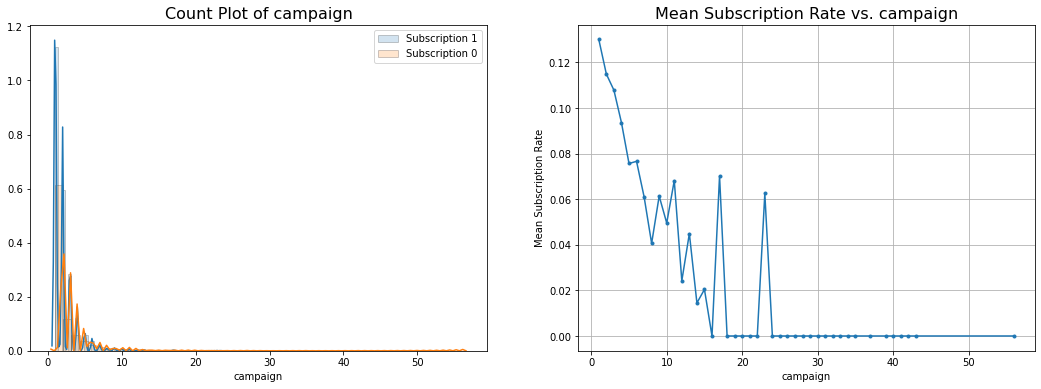

In [36]:
# histogram
grouped = df[['campaign', 'y']].groupby('campaign').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['campaign'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['campaign'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of campaign', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['campaign'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. campaign', fontsize=16)
ax[1].set_xlabel('campaign')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

In [37]:
# Feature Engineering
df['campaign'] = df['campaign'] - 1

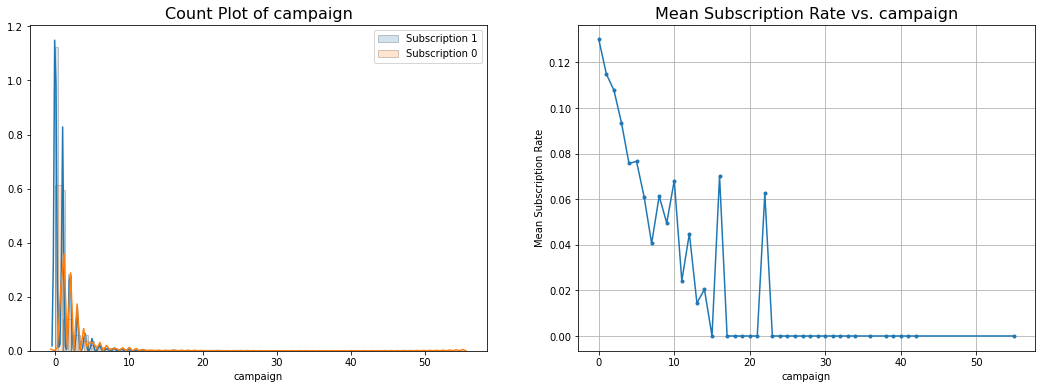

In [38]:
grouped = df[['campaign', 'y']].groupby('campaign').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['campaign'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['campaign'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of campaign', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['campaign'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. campaign', fontsize=16)
ax[1].set_xlabel('campaign')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

## pdays

In [39]:
# Feature Engineering
df['pdays'] = df['pdays'].apply(lambda x: str(x)).replace({'999': '0'})
df['pdays'] = df['pdays'].apply(lambda x: '1' if int(x) > 0 else '0')

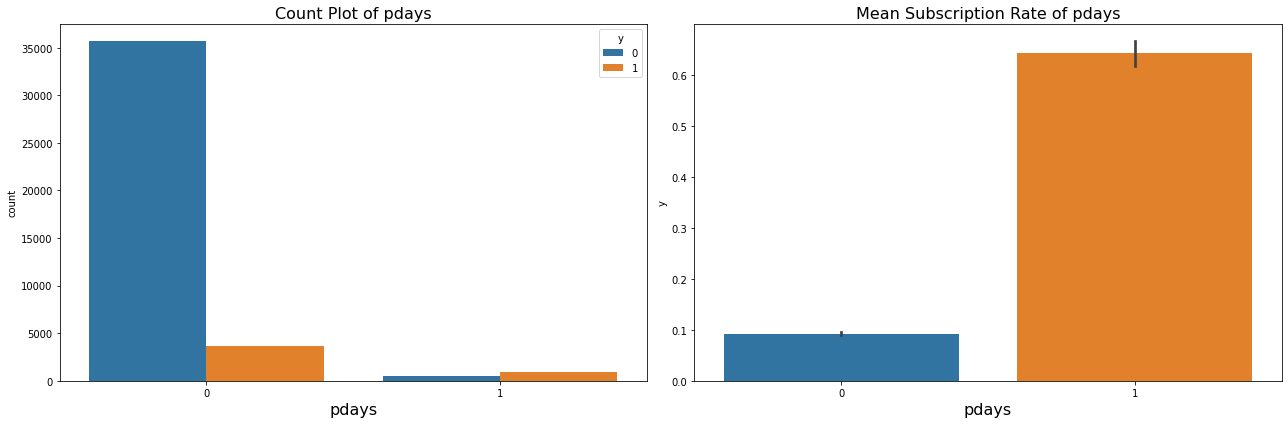

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different result
sns.countplot(x='pdays', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of pdays', fontsize=16)
ax[0].set_xlabel('pdays', fontsize=16)

# Subscription rate
sns.barplot(x='pdays', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of pdays', fontsize=16)
ax[1].set_xlabel('pdays', fontsize=16)

plt.tight_layout()
plt.show()

## previous

No handles with labels found to put in legend.


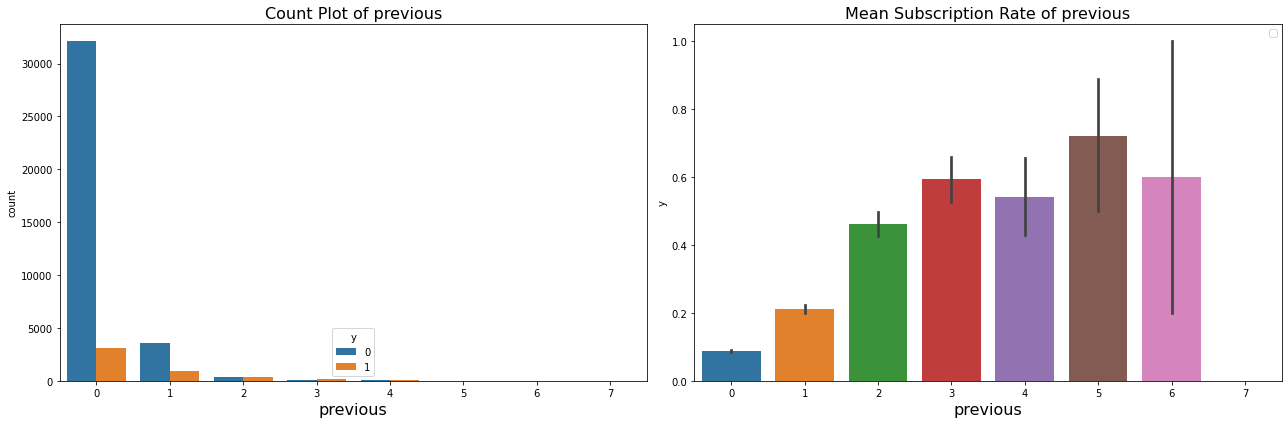

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='previous', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of previous', fontsize=16)
ax[0].set_xlabel('previous', fontsize=16)

# Subscription rate
sns.barplot(x='previous', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of previous', fontsize=16)
ax[1].set_xlabel('previous', fontsize=16)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

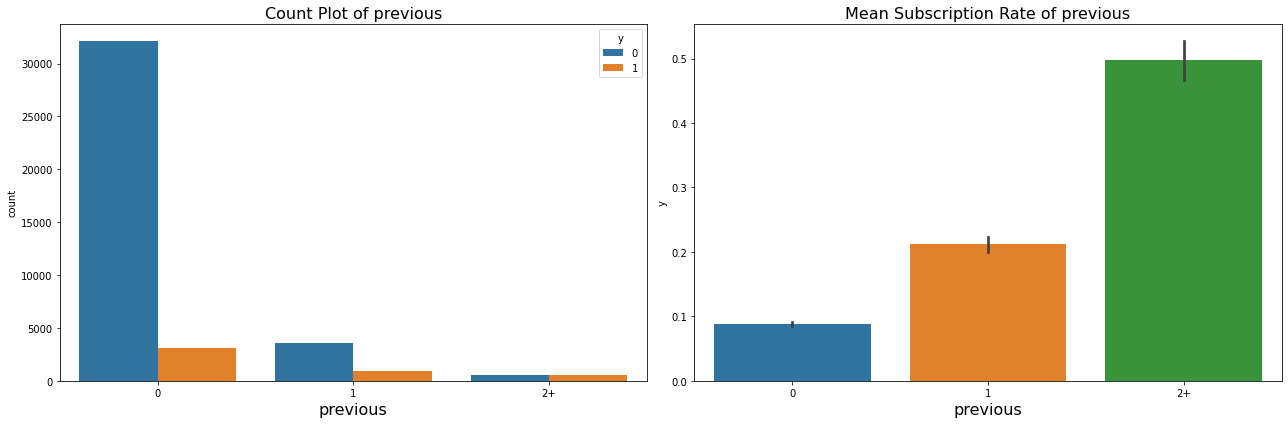

In [42]:
# Feature Engineering
df['previous'] = df['previous'].apply(lambda x: '2+' if x >= 2 else str(x))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.countplot(x='previous', hue='y', data=df, ax=ax[0])
ax[0].set_title('Count Plot of previous', fontsize=16)
ax[0].set_xlabel('previous', fontsize=16)

# Subscription rate
sns.barplot(x='previous', y='y', data=df, ax=ax[1])
ax[1].set_title('Mean Subscription Rate of previous', fontsize=16)
ax[1].set_xlabel('previous', fontsize=16)

plt.tight_layout()
plt.show()

## emp.var.rate

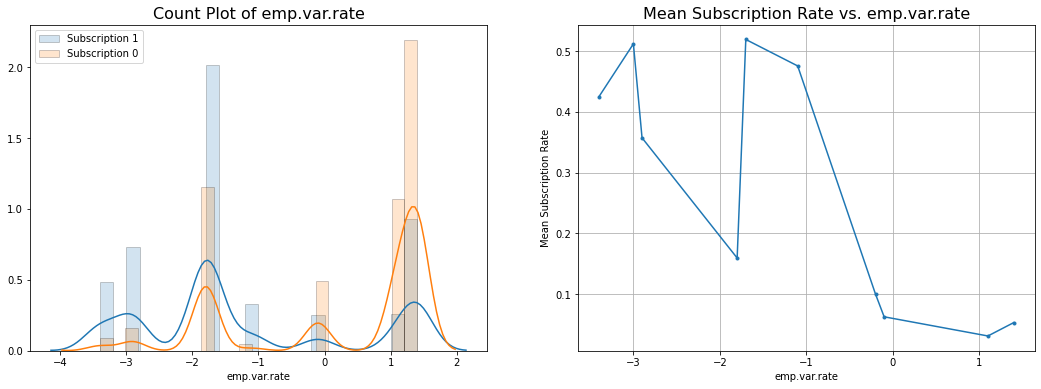

In [43]:
grouped = df[['emp.var.rate', 'y']].groupby('emp.var.rate').mean().reset_index()
# histogram
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['emp.var.rate'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['emp.var.rate'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of emp.var.rate', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['emp.var.rate'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. emp.var.rate', fontsize=16)
ax[1].set_xlabel('emp.var.rate')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

In [44]:
# Drop emp.var.rate
df.drop(columns='emp.var.rate', inplace=True)

## cons.price.idx

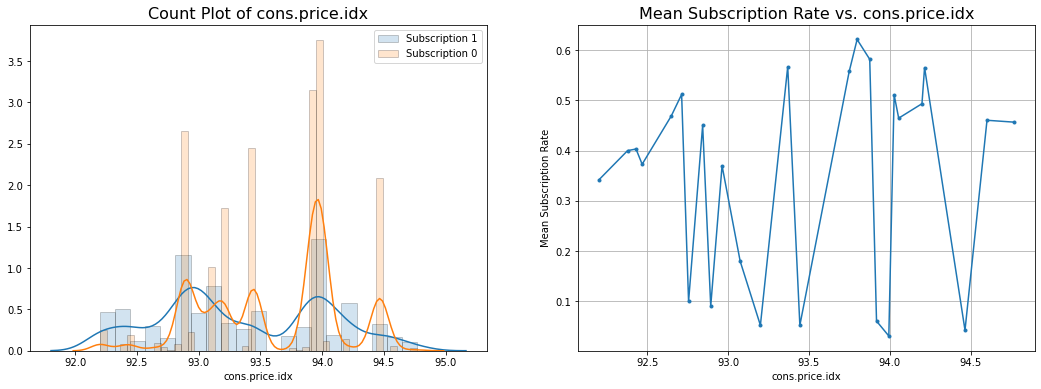

In [45]:
grouped = df[['cons.price.idx', 'y']].groupby('cons.price.idx').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['cons.price.idx'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['cons.price.idx'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of cons.price.idx', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['cons.price.idx'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. cons.price.idx', fontsize=16)
ax[1].set_xlabel('cons.price.idx')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

## cons.conf.idx

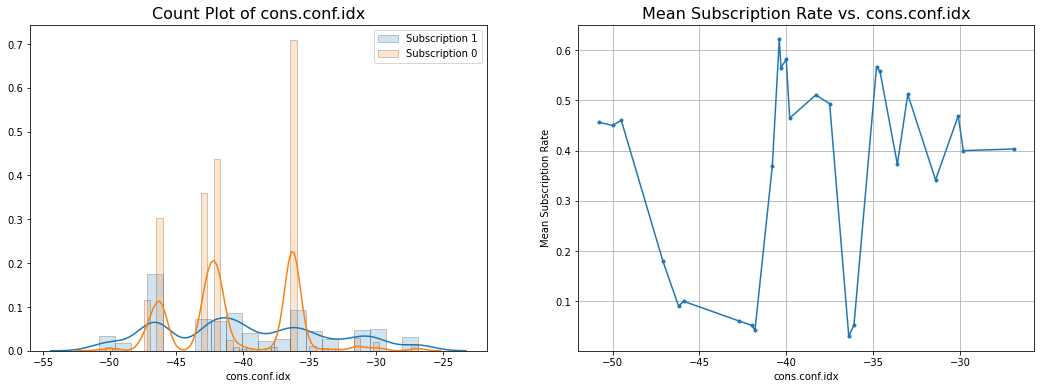

In [46]:
grouped = df[['cons.conf.idx', 'y']].groupby('cons.conf.idx').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['cons.conf.idx'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['cons.conf.idx'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of cons.conf.idx', fontsize=16)
ax[1].plot(grouped['cons.conf.idx'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. cons.conf.idx', fontsize=16)
ax[1].set_xlabel('cons.conf.idx')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.show()

## euribor3m

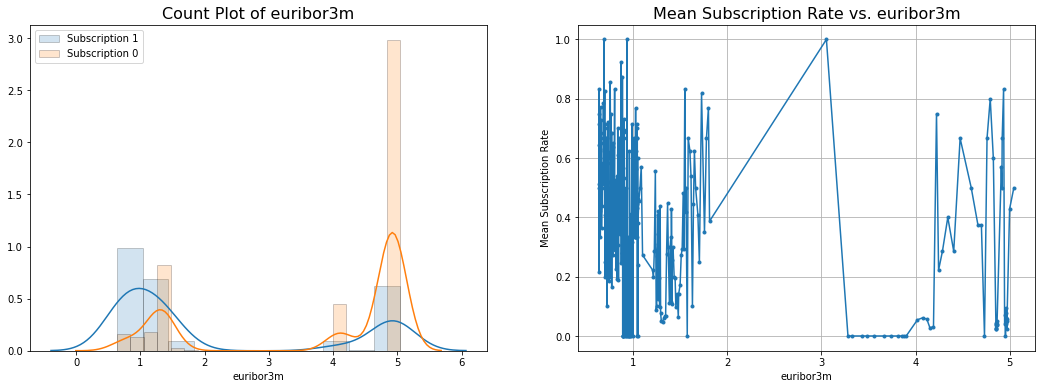

In [47]:
grouped = df[['euribor3m', 'y']].groupby('euribor3m').mean().reset_index()
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df[df['y'] == 1]['euribor3m'], label='Subscription 1', norm_hist= True,
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['euribor3m'], label='Subscription 0', norm_hist= True,
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of euribor3m', fontsize=16)
ax[1].plot(grouped['euribor3m'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. euribor3m', fontsize=16)
ax[1].set_xlabel('euribor3m')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)
ax[0].legend()
plt.show()

## nr.employed

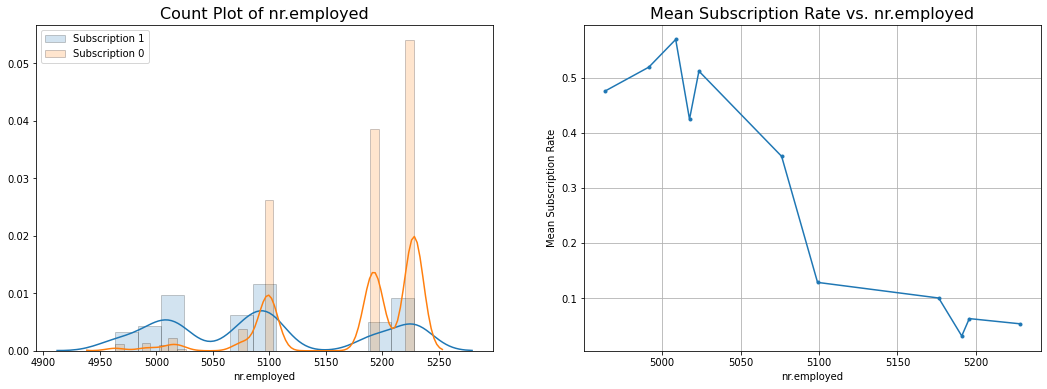

In [48]:
grouped = df[['nr.employed', 'y']].groupby('nr.employed').mean().reset_index()
# histogram
hist_kws = {'edgecolor':'black', 'histtype': 'bar', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Different results
sns.distplot(df[df['y'] == 1]['nr.employed'], label='Subscription 1',
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df[df['y'] == 0]['nr.employed'], label='Subscription 0',
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of nr.employed', fontsize=16)
ax[0].legend()

# Subscription rate
ax[1].plot(grouped['nr.employed'], grouped['y'], '.-')
ax[1].set_title('Mean Subscription Rate vs. nr.employed', fontsize=16)
ax[1].set_xlabel('nr.employed')
ax[1].set_ylabel('Mean Subscription Rate')
ax[1].grid(True)

plt.show()

## Feature Engineering 

## Feature Selection

In [49]:
"""
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['marital', 'contact', 'month', 'day_of_week', 'age_group']
for col in cols:
    df[col] = le.fit_transform(df[col])
"""

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ncols = ['marital', 'contact', 'month', 'day_of_week', 'age_group']\nfor col in cols:\n    df[col] = le.fit_transform(df[col])\n"

In [50]:
df.dtypes

job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays              object
previous           object
poutcome           object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
age_group          object
dtype: object

## Standard_Scaler

In [51]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes('float64').columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

df_scaled = df.drop(columns=num_cols, axis=1)
df_scaled = df_scaled.merge(scaled, left_index=True, right_index=True, how='left')

In [52]:
# One hot encoding with scaled
df_scaled_dummies = pd.get_dummies(df_scaled, drop_first=True)

In [53]:
# One hot encoding without scaled
df_dummies = pd.get_dummies(data=df, drop_first=True)

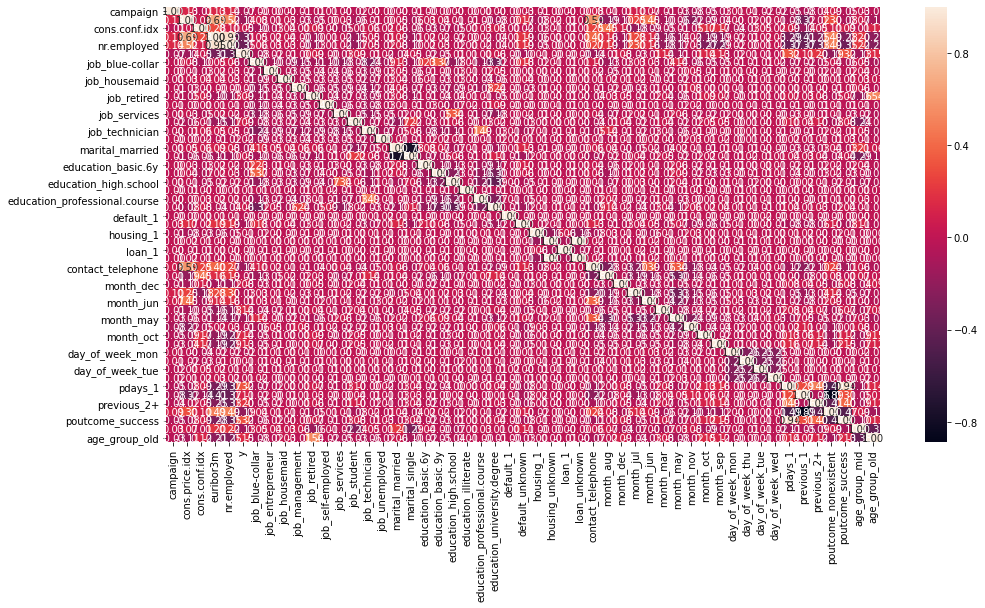

In [54]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_dummies.corr(), annot=True, fmt='.2f')

In [55]:
for i, v in enumerate(df_dummies.loc[0, :]):
    print('{:30}: {}'.format(df_dummies.columns[i], v))

campaign                      : 0.0
cons.price.idx                : 93.994
cons.conf.idx                 : -36.4
euribor3m                     : 4.857
nr.employed                   : 5191.0
y                             : 0.0
job_blue-collar               : 0.0
job_entrepreneur              : 0.0
job_housemaid                 : 1.0
job_management                : 0.0
job_retired                   : 0.0
job_self-employed             : 0.0
job_services                  : 0.0
job_student                   : 0.0
job_technician                : 0.0
job_unemployed                : 0.0
marital_married               : 1.0
marital_single                : 0.0
education_basic.6y            : 0.0
education_basic.9y            : 0.0
education_high.school         : 0.0
education_illiterate          : 0.0
education_professional.course : 0.0
education_university.degree   : 0.0
default_1                     : 0.0
default_unknown               : 0.0
housing_1                     : 0.0
housing_unknown   

In [56]:
df_dummies.shape

(40787, 51)

## Model Building

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, scorer, auc
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop(columns=['y']), df_dummies['y'], test_size=0.25, random_state=42)

def select_model_prediction(algorithm, train_x, test_x, train_y, test_y, cols, cf, threshold_plot=True):
    
    # model 
    algorithm.fit(train_x, train_y)
    predictions = algorithm.predict(test_x)
    
    probabilities = algorithm.predict_proba(test_x)
    
    # Choose logit or tree models
    if cf == 'coefficient':
        coefficients = pd.DataFrame(algorithm.coef_.ravel()) # ravel change to flat array
    elif cf == 'features':
        coefficients = pd.DataFrame(algorithm.feature_importances_)
    
    # Build feature importance dataframe
    columns_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients, columns_df, left_index=True, right_index=True, how='left'))
    coef_sumry.columns =  ['coefficients', 'features']
    coef_sumry = coef_sumry.sort_values(by='coefficients')
    
    print(type(algorithm).__name__)
    print('-' * 100)
    print('Accuracy: {:5.2f}'.format(accuracy_score(y_test, probabilities[:, 1] > 0.5)))
    print('F1: {:11.2f}'.format(f1_score(y_test, probabilities[:, 1] > 0.5)))
    print('Precision: {:4.2f}'.format(precision_score(y_test, probabilities[:, 1] > 0.5)))
    print('Recall: {:7.2f}'.format(recall_score(y_test, probabilities[:, 1] > 0.5)))
    
    conf_matrix = confusion_matrix(test_y, probabilities[:, 1] > 0.5)
    model_roc_auc = roc_auc_score(test_y, probabilities[:, 1] > 0.5)
    fpr, tpr, thresholds = roc_curve(test_y, probabilities[:, 1])
    
    # plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                       x = ['Not Subscribe', 'Subscribe'],
                       y = ['Not Subscribe', 'Subscribe'],
                       showscale=False, colorscale='Picnic',
                       name='matrix')

    # plot roc curve
    trace2 = go.Scatter(x = fpr, y= tpr,
                        name = 'Roc:' + str(model_roc_auc),
                        line = dict(color=('rgb(22, 96, 167)'), width=2))
    trace3 = go.Scatter(x = [0, 1], y = [0, 1],
                        line=dict(color=('rgb(205, 12, 24)'), width=2,
                        dash = 'dot'))
    
    # plot coeffs
    trace4 = go.Bar(y=coef_sumry['features'], x=coef_sumry['coefficients'],
                    name='coefficients',
                    orientation='h',
                    marker = dict(color=coef_sumry['coefficients'],
                                  colorscale='Picnic',
                                  line=dict(width=.6, color='black')))
    
    # subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion_Matrix',
                                            'Receiver Operating Characteristic',
                                            'Feature Importance'))
    
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)
    fig.append_trace(trace4, 2, 1)
    
    fig['layout'].update(showlegend=False, title='Model performance',
                         autosize=False, height=900, width=1000,
                         plot_bgcolor='rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin=dict(b=195))
    
    fig['layout']['xaxis2'].update(dict(title='false positive rate'))
    fig['layout']['yaxis2'].update(dict(title='true positive rate'))
    fig['layout']['xaxis3'].update(dict(showgrid=True, tickfont=dict(size=10)),
                                   tickangle=0)
    py.iplot(fig)
    
    if threshold_plot == True:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(train_x, train_y)
        visualizer.poof()

LogisticRegression
----------------------------------------------------------------------------------------------------
Accuracy:  0.82
F1:        0.45
Precision: 0.34
Recall:    0.65


/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



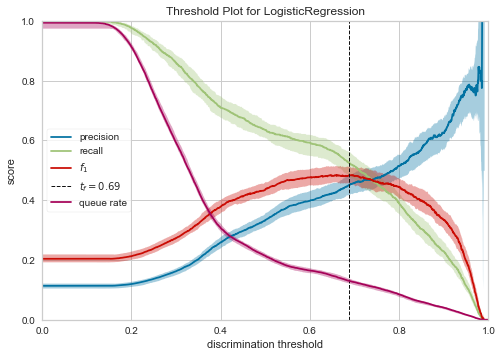

In [58]:
from sklearn.linear_model import LogisticRegression

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled_dummies.drop(columns=['y']), df_scaled_dummies['y'], test_size=0.25, random_state=42)

lr = LogisticRegression(class_weight={0:1 , 1:8})
select_model_prediction (lr, X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test,
                         X_train.columns, "coefficient", threshold_plot = True)

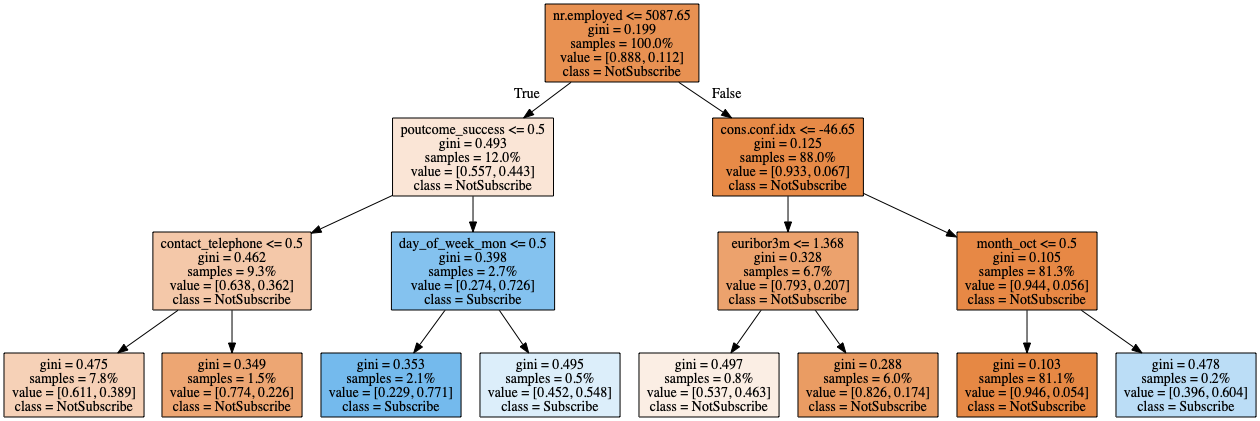

In [59]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# Plot the tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, min_samples_split=20)
dt.fit(X_train,y_train)
export_graphviz(dt,feature_names=X_train.columns,class_names=['NotSubscribe','Subscribe'], 
                out_file='tree_decision_classifier.dot',
                proportion=True,leaves_parallel=True,filled=True)

# Use Jupyter notebok to run the command
from subprocess import call
call(['dot', '-Tpng', 'tree_decision_classifier.dot', '-o', 'tree_decision_classifier.png'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_decision_classifier.png')

RandomForestClassifier
----------------------------------------------------------------------------------------------------
Accuracy:  0.88
F1:        0.32
Precision: 0.43
Recall:    0.25


/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



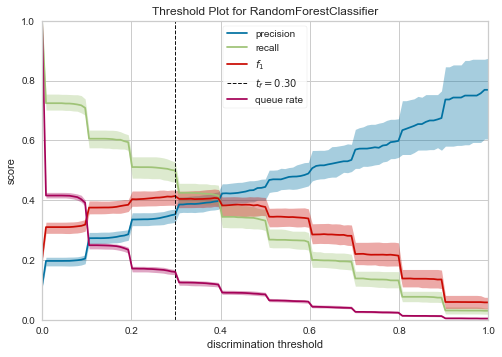

In [60]:
rf  = RandomForestClassifier(class_weight={0: 1, 1: 8})
#跑model
select_model_prediction (rf, X_train,X_test,y_train,y_test,
                         X_train.columns,"features",threshold_plot = True)

GradientBoostingClassifier
----------------------------------------------------------------------------------------------------
Accuracy:  0.90
F1:        0.35
Precision: 0.66
Recall:    0.24


/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



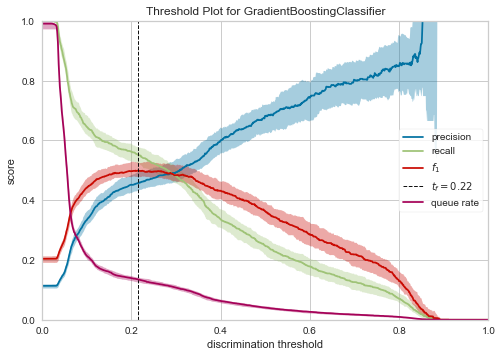

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
select_model_prediction (gb, X_train,X_test,y_train,y_test,
                         X_train.columns,"features",threshold_plot = True)

## H2O

In [62]:
def plot_figures(conf_matrix, fpr, tpr, coef_sumry, model_roc_auc):
    # plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                       x = ['Not Subscribe', 'Subscribe'],
                       y = ['Not Subscribe', 'Subscribe'],
                       showscale=False, colorscale='Picnic',
                       name='matrix')

    # plot roc curve
    trace2 = go.Scatter(x = fpr, y= tpr,
                        name = 'Roc:' + str(model_roc_auc),
                        line = dict(color=('rgb(22, 96, 167)'), width=2))
    trace3 = go.Scatter(x = [0, 1], y = [0, 1],
                        line=dict(color=('rgb(205, 12, 24)'), width=2,
                        dash = 'dot'))
    
    # plot coeffs
    trace4 = go.Bar(y=coef_sumry['variable'], x=coef_sumry['percentage'],
                    name='percentage',
                    orientation='h',
                    marker = dict(color=coef_sumry['percentage'],
                                  colorscale='Picnic',
                                  line=dict(width=.6, color='black')))
    
    # subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion_Matrix',
                                            'Receiver Operating Characteristic',
                                            'Feature Importance'))
    
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)
    fig.append_trace(trace4, 2, 1)
    
    fig['layout'].update(showlegend=False, title='Model performance',
                         autosize=False, height=900, width=800,
                         plot_bgcolor='rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin=dict(b=195))
    
    fig['layout']['xaxis2'].update(dict(title='false positive rate'))
    fig['layout']['yaxis2'].update(dict(title='true positive rate'))
    fig['layout']['xaxis3'].update(dict(showgrid=True, tickfont=dict(size=10)),
                                   tickangle=0)
    py.iplot(fig)

In [63]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [64]:
# Initializae H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gp/19tj739n7j77z4g4755c2wym0000gn/T/tmpnhf2m_ho
  JVM stdout: /var/folders/gp/19tj739n7j77z4g4755c2wym0000gn/T/tmpnhf2m_ho/h2o_apple_started_from_python.out
  JVM stderr: /var/folders/gp/19tj739n7j77z4g4755c2wym0000gn/T/tmpnhf2m_ho/h2o_apple_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Phoenix
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,3 months and 8 days
H2O cluster name:,H2O_from_python_apple_32v98v
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [65]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,housemaid,married,basic.4y,0,0,0,telephone,may,mon,0,0,0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
1,services,married,high.school,unknown,0,0,telephone,may,mon,0,0,0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
2,services,married,high.school,0,1,0,telephone,may,mon,0,0,0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
3,admin.,married,basic.6y,0,0,0,telephone,may,mon,0,0,0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
4,services,married,high.school,0,0,1,telephone,may,mon,0,0,0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid


In [66]:
# Transform to H2O Frame, and make sure the target variable is categorical
h2o_df = H2OFrame(df)

h2o_df['job'] = h2o_df['job'].asfactor()
h2o_df['marital'] = h2o_df['marital'].asfactor()
h2o_df['education'] = h2o_df['education'].asfactor()
h2o_df['contact'] = h2o_df['contact'].asfactor()
h2o_df['housing'] = h2o_df['housing'].asfactor()
h2o_df['loan'] = h2o_df['loan'].asfactor()
h2o_df['month'] = h2o_df['month'].asfactor()
h2o_df['day_of_week'] = h2o_df['day_of_week'].asfactor()
h2o_df['poutcome'] = h2o_df['poutcome'].asfactor()
h2o_df['age_group'] = h2o_df['age_group'].asfactor()
h2o_df['pdays'] = h2o_df['age_group'].asfactor()
h2o_df['default'] = h2o_df['default'].asfactor()
h2o_df['y'] = h2o_df['y'].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,int,enum,real,real,real,real,enum,enum
mins,,,,,,,,,,0.0,,0.0,,92.201,-50.8,0.634,4963.6,,
mean,,,,,,,,,,1.5661117512933045,,0.11379249603663907,,93.57480447201308,-40.515769730551284,3.619531566430489,5167.0178659867315,,
maxs,,,,,,,,,,55.0,,1.0,,94.767,-26.9,5.045,5228.1,,
sigma,,,,,,,,,,2.7681033058571276,,0.3175630671197901,,0.5785581462604052,4.626805475666592,1.7344160998946911,72.23184333901874,,
zeros,,,,,,,,,,17452,,35217,,0,0,0,0,,
missing,0,0,0,8436,984,984,0,0,0,0,0,1048,0,0,0,0,0,0,0
0,housemaid,married,basic.4y,0,0,0,telephone,may,mon,0.0,mid,0.0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
1,services,married,high.school,,0,0,telephone,may,mon,0.0,mid,0.0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid
2,services,married,high.school,0,1,0,telephone,may,mon,0.0,mid,0.0,nonexistent,93.994,-36.4,4.857,5191.0,0,mid


In [67]:
# Split into 75% training and 25% test dataset
strat_split = h2o_df['y'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'age_group']
target = 'y'

In [68]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=1000,
                                 mtries=-1, seed=42, score_each_iteration=True)

model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
# Make predictions
train_true = train.as_data_frame()['y'].values
test_true = test.as_data_frame()['y'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [70]:
importance = model.varimp(use_pandas=True)
importance

,variable,relative_importance,scaled_importance,percentage
0,euribor3m,1.145314e+06,1.000000,0.175556
1,nr.employed,1.018455e+06,0.889237,0.156111
2,job,6.711383e+05,0.585986,0.102874
3,education,4.739837e+05,0.413846,0.072653
4,campaign,4.458015e+05,0.389240,0.068333
5,day_of_week,4.432032e+05,0.386971,0.067935
6,month,3.972424e+05,0.346842,0.060890
7,poutcome,3.250359e+05,0.283796,0.049822
8,cons.conf.idx,2.900610e+05,0.253259,0.044461
9,marital,2.529805e+05,0.220883,0.038777


In [71]:
print('Accuracy: {:5.2f}'.format(accuracy_score(test_true, test_pred > 0.08)))
print('F1: {:11.2f}'.format(f1_score(test_true, test_pred > 0.08)))
print('Precision: {:4.2f}'.format(precision_score(test_true, test_pred > 0.08)))
print('Recall: {:7.2f}'.format(recall_score(test_true, test_pred > 0.08)))

Accuracy:  0.84
F1:        0.44
Precision: 0.36
Recall:    0.54


In [72]:
conf_matrix = confusion_matrix(test_true, test_pred > 0.08)
plot_figures(conf_matrix, test_fpr, test_tpr, importance.sort_values(by='percentage'), test_auc)

/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [73]:
print(classification_report(test_true, (test_pred>0.10).astype(int)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      9048
           1       0.41      0.49      0.44      1149

    accuracy                           0.86     10197
   macro avg       0.67      0.70      0.68     10197
weighted avg       0.87      0.86      0.87     10197



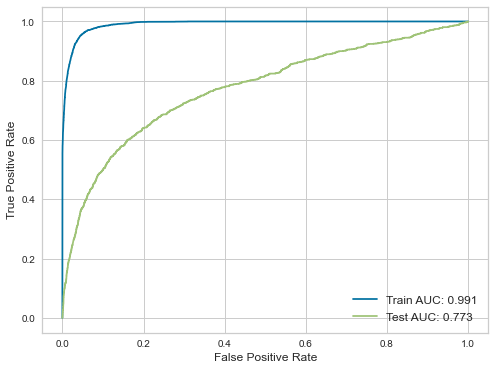

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

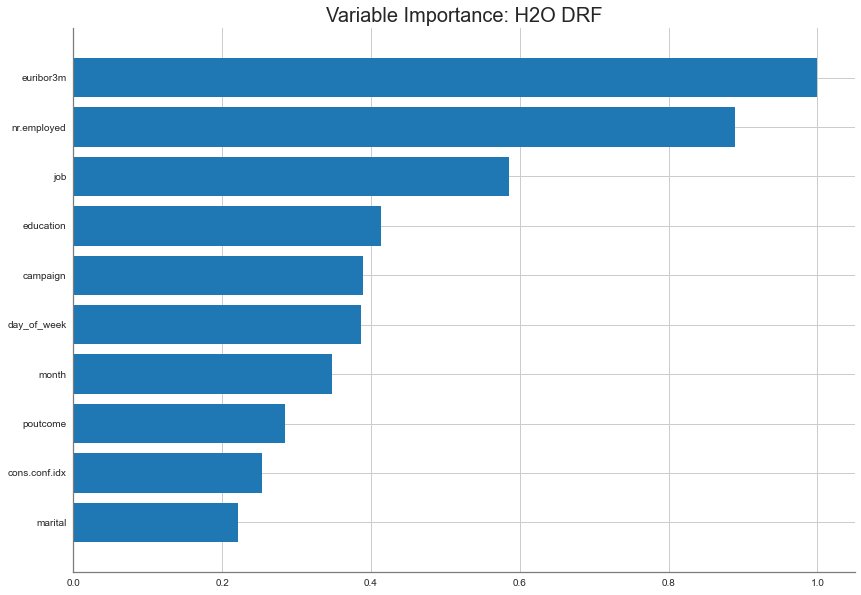

In [75]:
model.varimp_plot()

In [76]:
df.loc[40161,:]

job                          admin.
marital                     married
education         university.degree
default                           0
housing                           1
loan                              0
contact                    cellular
month                           sep
day_of_week                     wed
campaign                          0
pdays                             0
previous                          1
poutcome                    failure
cons.price.idx               94.199
cons.conf.idx                 -37.5
euribor3m                     0.886
nr.employed                  4963.6
y                                 1
age_group                       mid
Name: 40161, dtype: object

In [77]:
test_pred[9963]

0.4381193679437215

In [78]:
test.as_data_frame().loc[(test.as_data_frame()['job'] == 'student') & (test.as_data_frame()['month'] == 'jul') \
                          & (test.as_data_frame()['poutcome'] == 'success')]

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
9940,student,single,university.degree,0.0,0.0,0.0,telephone,jul,thu,0,low,1.0,success,94.215,-40.3,0.810,4991.6,1,low
9963,student,single,basic.9y,0.0,1.0,0.0,cellular,jul,thu,2,low,NaN,success,94.215,-40.3,0.846,4991.6,1,low
9973,student,single,university.degree,0.0,0.0,0.0,cellular,jul,tue,1,low,1.0,success,94.215,-40.3,0.876,4991.6,1,low


In [79]:
from h2o.estimators import H2OGradientBoostingEstimator

# Build and train the model:
model = H2OGradientBoostingEstimator(nfolds=5,
                                     ntrees=1000,
                                     seed=42,
                                     keep_cross_validation_predictions = True,
                                     balance_classes=True)
model.train(x=feature, y=target, training_frame=train)

# Make predictions
train_true = train.as_data_frame()['y'].values
test_true = test.as_data_frame()['y'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [80]:
importance1 = model.varimp(use_pandas=True)
importance1

,variable,relative_importance,scaled_importance,percentage
0,nr.employed,14514.041992,1.000000,0.498988
1,month,4438.125977,0.305782,0.152581
2,euribor3m,2507.496582,0.172763,0.086207
3,job,2196.162109,0.151313,0.075503
4,day_of_week,1020.409851,0.070305,0.035081
5,education,933.143982,0.064292,0.032081
6,poutcome,856.648743,0.059022,0.029451
7,campaign,645.600647,0.044481,0.022196
8,contact,579.076660,0.039898,0.019908
9,marital,287.791901,0.019829,0.009894


In [81]:
print('Accuracy: {:5.2f}'.format(accuracy_score(test_true, test_pred > 0.13)))
print('F1: {:11.2f}'.format(f1_score(test_true, test_pred > 0.13)))
print('Precision: {:4.2f}'.format(precision_score(test_true, test_pred > 0.13)))
print('Recall: {:7.2f}'.format(recall_score(test_true, test_pred > 0.13)))

Accuracy:  0.86
F1:        0.48
Precision: 0.41
Recall:    0.59


In [82]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(test_true,test_pred)

In [83]:
threshold

[0.06927578991621408]

In [84]:
conf_matrix = confusion_matrix(test_true, test_pred > 0.13)
plot_figures(conf_matrix, test_fpr, test_tpr, importance1.sort_values(by='percentage'), test_auc)

/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [85]:
print(classification_report(test_true, (test_pred>0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9048
           1       0.68      0.22      0.33      1149

    accuracy                           0.90     10197
   macro avg       0.79      0.60      0.64     10197
weighted avg       0.88      0.90      0.88     10197



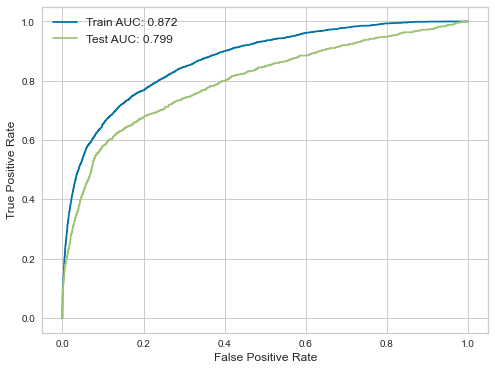

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

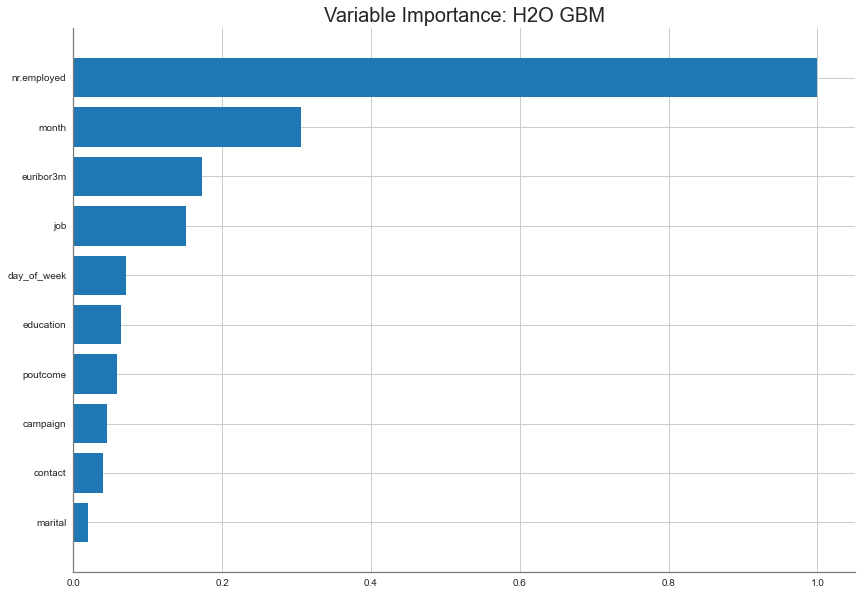

In [87]:
model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


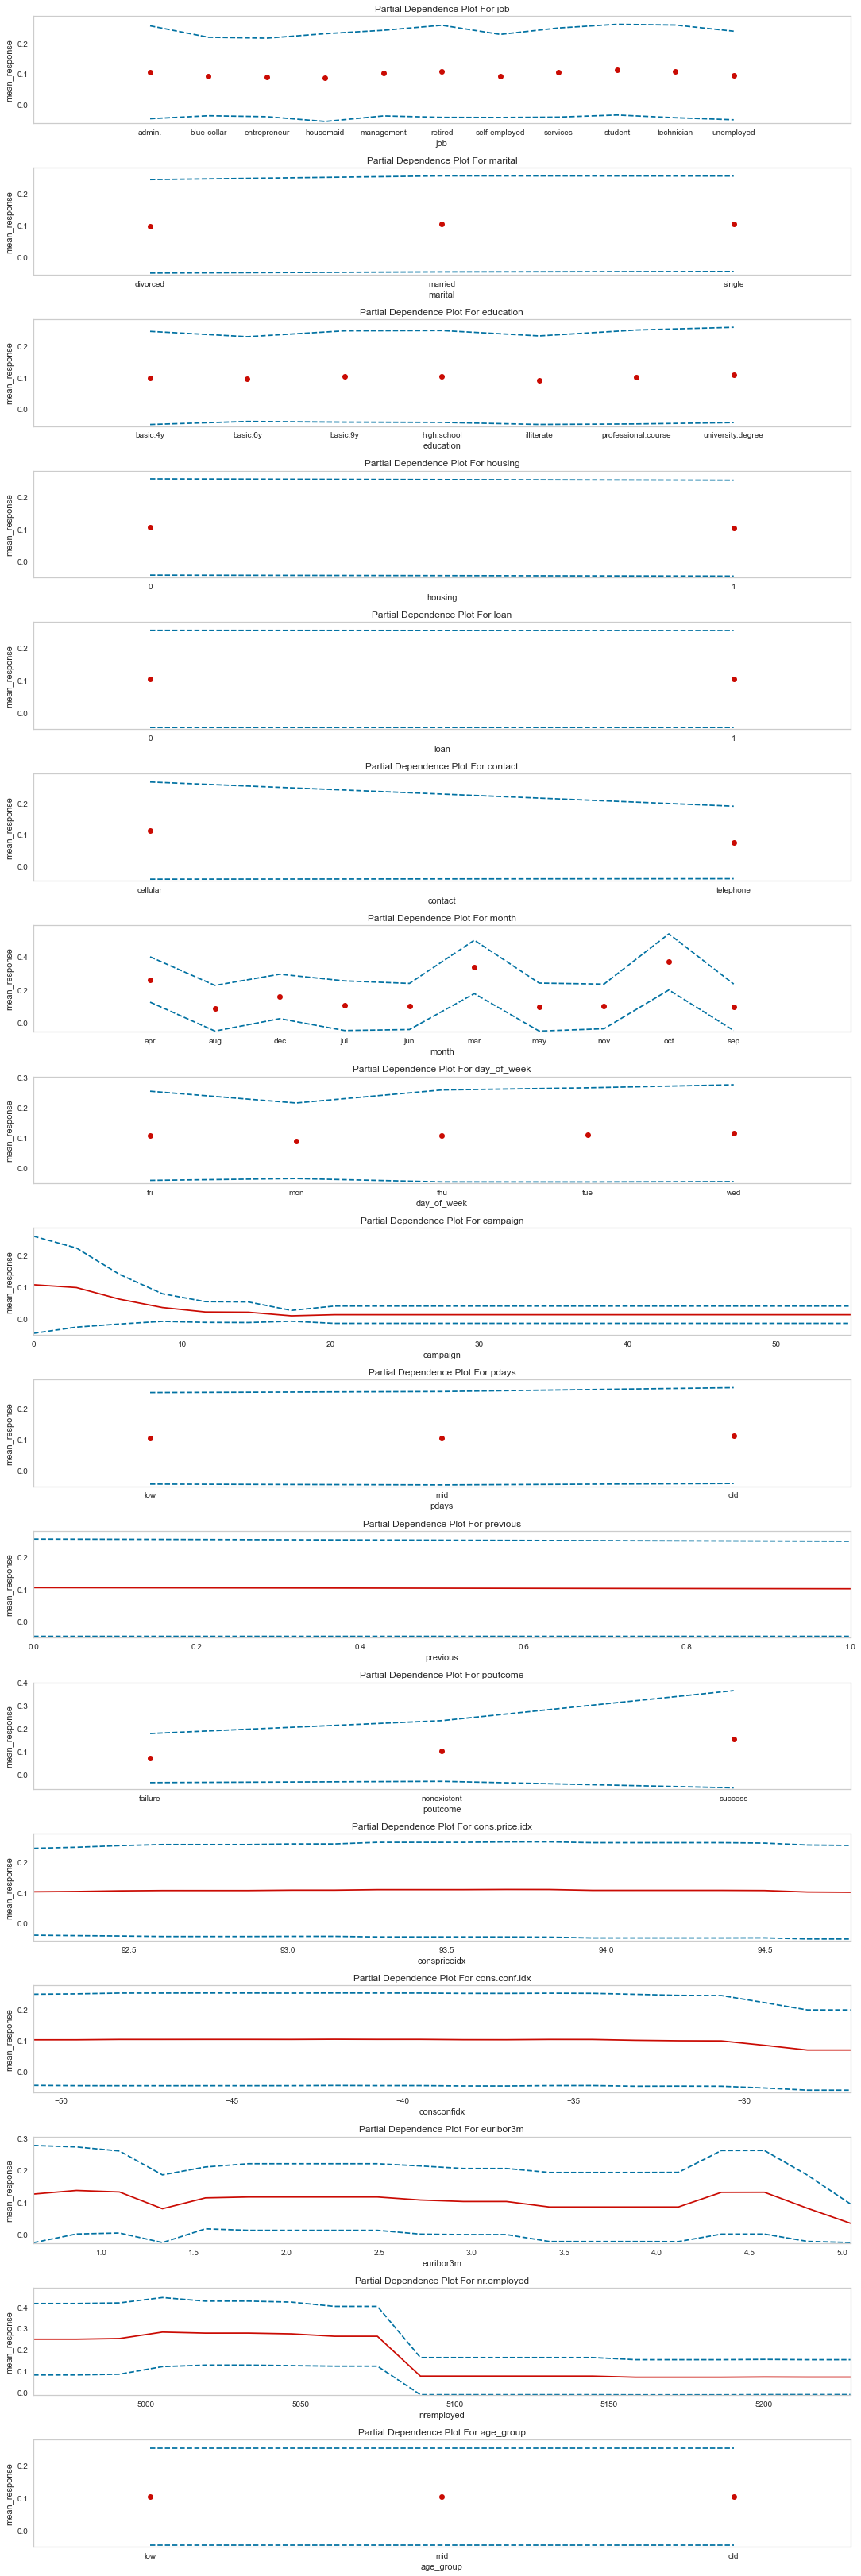

In [88]:
_ = model.partial_plot(train, cols=feature, figsize=(15, 45))